# Homework 5

## Read the *People.csv* file using Pandas and answer the following questions. Show work. Use Markdown text or comments to differentiate between your answer to each question.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('People.csv')

### Q1 . How many columns have nonnumeric (integer or float) data? Which columns are those?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
nonnumeric_columns=[]
for i in data.select_dtypes(include=['object']).columns.tolist():
    nonnumeric_columns.append(i)

In [5]:
print(len(nonnumeric_columns)," columns have non-numeric data")
print("They are: ", nonnumeric_columns)

2  columns have non-numeric data
They are:  ['department', 'salary']


### Q2. What is the shape of the dataframe (# of rows and columns)? Subset only numeric columns (i.e. create a new dataframe for them), what is the shape now?

In [6]:
# 1) data shape
data.shape

(14999, 10)

In [7]:
numeric_columns=[]
for i in data.select_dtypes(include=["int","float"]).columns.tolist():
    numeric_columns.append(i)

In [8]:
print(numeric_columns)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'churn', 'promotion_last_5years']


In [9]:
numeric_data=data.loc[:,['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'churn', 'promotion_last_5years']]

In [10]:
numeric_data.shape

(14999, 8)

In [11]:
# The new shape has decreased by 2 columns, which is the number of non-numeric columns

### Q3. Report descriptive analytics of the data (median, max, min, count etc.).

In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Q4. Subset only non numeric columns (i.e. create a new dataframe for objects), what is the shape now? How many unique values each of these columns has? Use for loop to print the unique values of those columns, use for loop to print the value counts for this columns.

In [13]:
nonnumeric_data=data.loc[:,['department', 'salary']]

In [14]:
nonnumeric_data.shape

(14999, 2)

In [15]:
nonnumeric_columns

['department', 'salary']

In [16]:
for i in nonnumeric_columns:
    print(i, nonnumeric_data[i].nunique())

department 10
salary 3


In [17]:
for i in nonnumeric_columns:
    print(nonnumeric_data[i].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [40]:
for i in nonnumeric_columns:
    print(nonnumeric_data[i].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


### Q5. Use the dataframe with only numeric columns, use for loop to print unique values of all columns which have less than 11 unique values.

In [19]:
for i in numeric_columns:
    if numeric_data[i].nunique()<11:
        print(i, numeric_data[i].unique())

number_project [2 5 7 6 4 3]
time_spend_company [ 3  6  4  5  2  8 10  7]
work_accident [0 1]
churn [1 0]
promotion_last_5years [0 1]


### Q6. Use dataframe of non numeric variables , create dummy variables for them and join it to numeric data frame to create a new dataframe will all numeric values.

In [20]:
my_dumies=pd.get_dummies(nonnumeric_data,drop_first=True)

In [21]:
my_dumies.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [23]:
new_data=numeric_data.join(my_dumies)

In [24]:
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Q7. Use for loop on the new dataframe to show a distribution plot (from seaborn) for only those columns that have more than 10 unique values.

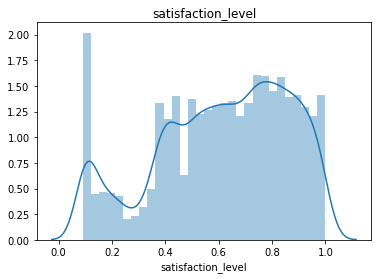

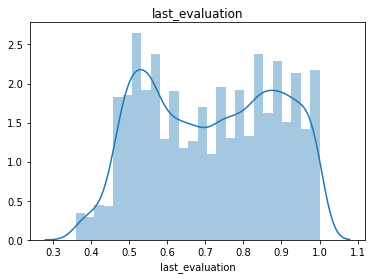

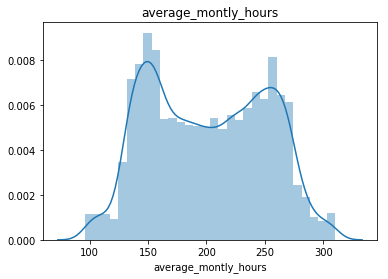

In [26]:
for i in new_data.columns:
    if new_data[i].nunique()>10:
        sns.distplot(new_data[i])
        plt.title(i)
        plt.show()

### Q8. Use cross tabulations to count the number of observations per salary category and department.

In [29]:
pd.crosstab(index=nonnumeric_data.salary,columns=nonnumeric_data.department)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


### Q9. Use pivot tables to calculate average satisfaction level per salary category.

In [30]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
pd.pivot_table(data=data,index="salary",values="satisfaction_level",aggfunc="mean")

,satisfaction_level
salary,
high,0.637470
low,0.600753
medium,0.621817


### Q10. Calculate the percentage of people who churned (Churn = 1) and who did not churn. Plot a pie chart based on that information.

In [32]:
my_churn=data["churn"].value_counts()/data.shape[0]*100

In [33]:
my_churn

0    76.191746
1    23.808254
Name: churn, dtype: float64

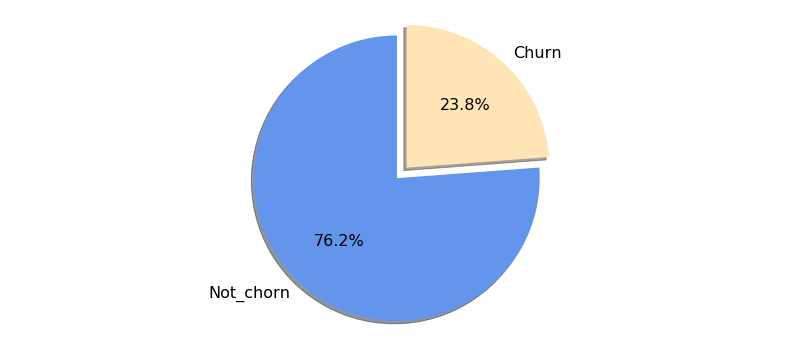

In [35]:
labels = ['Not_chorn', 'Churn']
sizes = [my_churn[0],my_churn[1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Churn')

plt.figure(figsize=(14,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 16},
        shadow=True, startangle=90, colors=['cornflowerblue','moccasin'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()